# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [ ]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data() # в переменной X - изображения цифр, в y - подпись цифры на каждом изображении

11490434/11490434 [==============================] - 0s 0us/step


Пример вывода нескольких объектов и соответствующих меток классов:

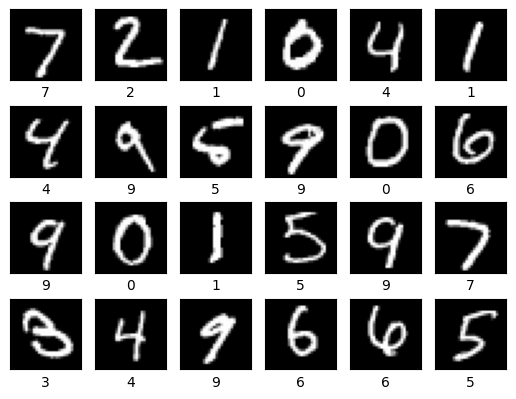

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6) # ax представляет собой массив подграфиков
for i, axi in enumerate(ax.flat): # ax.flat позволяет итерироваться по ним в виде плоского списка. enumerate добавляет индекс i к каждому подграфику axi.
    axi.imshow(X[i], cmap='gray') # в каждом подграфике отображается изображение цифры из массива X с индексом i
    axi.set(xticks=[], yticks=[]) # убираются метки на осях x и y для каждого подграфика.
    axi.set_xlabel(y[i], color='black') # устанавливается подпись на оси x для каждого подграфика, где y[i] — соответствующая подпись изображения цифры из массива y

Введите <code>.shape</code> полученного набора данных

In [ ]:
print(X.shape, y.shape)

(10000, 28, 28) (10000,)




```
# В X - 10,000 изображений размером 28x28 пикселей. В y - 10,000 меток, по одной на каждое изображение.
```



При помощи <code>train_test_split</code> разобейте полученный набор данных на тренировочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [ ]:
# K-means требует 2D массив, поэтому преобразуем (N, 28, 28) в (N, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
print(X_train.shape, X_test.shape)

(8000, 784) (2000, 784)




```
# Теперь в X находятся изображения в виде векторов с 784 значениями (пикселями)
```



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=21, n_clusters=10).fit(X_train)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [ ]:
train_clusters = kmeans.labels_ # получение меток кластеров для каждого элемента из X_train (в какую по счету группу из 10 его отнесла система)

In [ ]:
number = 9

sum(train_clusters == number) # ищем, сколько элементов (изображений) попало в кластер №9

711

Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



In [ ]:
centroids = kmeans.cluster_centers_ # получаем центроид для каждого кластера - среднее значение всех точек - пикселей изображений, принадлежащих данному кластеру.
centroids.shape

(10, 784)



```
# Поскольку у нас 10 кластеров и по 784 пикселя в изображении, получаем усредненные 10 изображений по каждом класетру
```



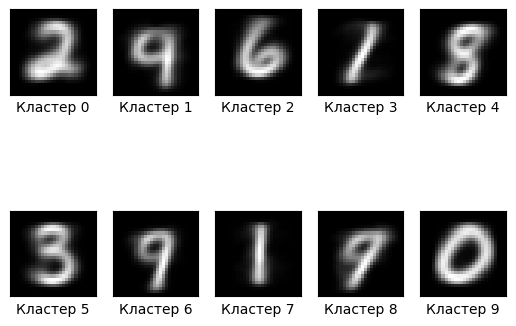

In [ ]:
fig, ax = plt.subplots(2, 5) # создаем 10 подграфиков (поскольку имеем 10 кластеров)
for i, axi in enumerate(ax.flat):
    centroid = centroids[i].reshape(28, 28) # снова возвращаем все пиксели в изображение 28x28
    axi.imshow(centroid, cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(f"Кластер {i}", color='black') # отображаем к какому кластеру (по счету) попало изображение

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.



```
# Не хватает цифры 7 - могла быть перепутана с 1; скорее всего 7 находится в "Кластере 3", а 1 - в "Кластере 7"

# Также нет четких цифр 4 и 5 - все выглядят как 9
```



Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [ ]:
cluster_labels = []
for i in range(10):  # 10 кластеров
    # Получение всех меток y_train для текущего кластера
    cluster_indices = np.where(train_clusters == i)[0] # получаем индексы элементов, которым присвоено значение (от 0 до 9)
    cluster_digit_labels = y_train[cluster_indices] # по этим индексам получаем элементы из y_train (реальные метки)
    # Находим наиболее часто встречающуюся метку
    most_common_label = np.bincount(cluster_digit_labels).argmax() # считаем все уникальные цифры и находим самые часто встречаемые
    cluster_labels.append(most_common_label)
cluster_labels

[2, 4, 6, 1, 8, 3, 7, 1, 7, 0]



```
# Получаем список из "правильных меток" выделенных кластеров (не по порядку, а по самой часто встречемой цифре)
```



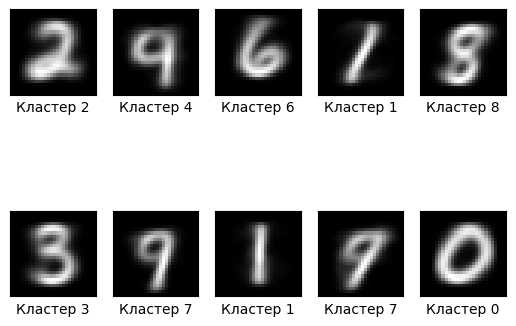

In [ ]:
# Визуализация центроидов с правильными метками
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    centroid = centroids[i].reshape(28, 28)
    axi.imshow(centroid, cmap='gray')
    axi.set(xticks=[], yticks=[])
    label = cluster_labels[i] # Получение правильной метки для кластера
    axi.set_xlabel(f'Кластер {label}')



```
# Оказалось, что 1 на самом деле находилась и в третьем и в седьмом по счету кластере (хотя, очевидно, один из этих двух кластеров все же содержит 7)
# А цифра 9 кажется была перепутана с 7 (наверное она либо в 6, либо в 8 по счету кластере)
# Цифру 5 алгоритм также не нашел, хотя она должна занять место одной из цифр, напоминающих девятку
```





Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [ ]:
from sklearn.metrics import accuracy_score

# Для каждой метки кластера i мы используем список cluster_labels, который содержит правильные метки для каждого кластера (вычисленные ранее),
# чтобы найти "правильную" метку кластера для объекта в тренировочном наборе данных.
predicted_labels = [cluster_labels[i] for i in train_clusters]

# сравниваем два списка меток и возвращаем долю правильно угаданных меток (то есть долю меток, которые совпадают).
accuracy = accuracy_score(y_train, predicted_labels)
round(accuracy, 3)

0.59

При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
# Кластеризация тестовых данных
test_clusters = kmeans.predict(X_test)

# Переименование предсказанных меток кластеров на основе преобразования для тренировочных данных
predicted_test_labels = [cluster_labels[i] for i in test_clusters]

Постройте матрицу ошибок.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted_test_labels)
conf_matrix

array([[164,   0,   1,  13,   0,   0,   7,   9,  12,   0],
       [  0, 213,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,  26, 146,   9,   6,   0,   5,   7,   6,   0],
       [  0,  15,  11, 140,   5,   0,   1,   4,  32,   0],
       [  0,   7,   0,   0,  73,   0,   3,  91,   0,   0],
       [  1,  14,   0,  63,   5,   0,   2,  37,  64,   0],
       [  4,   8,   2,   0,   6,   0, 154,   0,  10,   0],
       [  1,  18,   2,   0,  21,   0,   0, 183,   0,   0],
       [  4,  16,   3,  34,   4,   0,   5,  21, 113,   0],
       [  0,   2,   0,   2,  56,   0,   0, 135,   3,   0]])



```
# Каждый элемент conf_matrix[i, j] представляет собой количество объектов,
# для которых истинная метка равна i, а предсказанная метка равна j.
```



Text(50.722222222222214, 0.5, 'Настоящяя цифра')

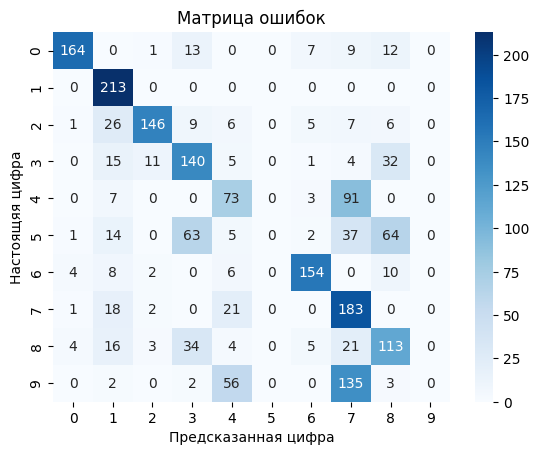

In [ ]:
# Тепловая карта для наглядности
import seaborn as sns

class_names = [str(i) for i in range(10)] # Метки классов - цифры

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Матрица ошибок")
plt.xlabel("Предсказанная цифра")
plt.ylabel("Настоящяя цифра")

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
number = 9

row = conf_matrix[number] # строка с цифрой

# Находим индекс максимального значения в строке (кроме диагонального элемента)
confused_index = np.argmax(row[np.arange(len(row)) != number])
confused_index

7

Вычислите точность модели на тестовых данных.

In [ ]:
accuracy = accuracy_score(y_test, predicted_test_labels)
round(accuracy, 3)

0.593

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

([<matplotlib.axis.XTick at 0x78e6c2cb52a0>,
 [Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

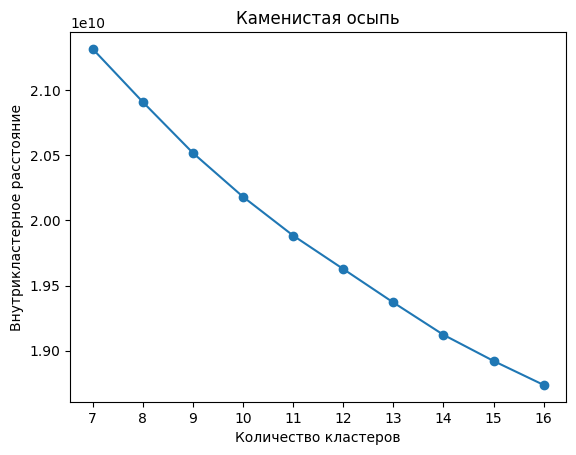

In [ ]:
inertia = [] # список сумм внутрикластерных расстояний для каждой модели
for k in range(7, 17):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(7, 17), inertia, marker='o')
plt.title('Каменистая осыпь')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.xticks(range(7, 17))



```
# Уверенно оценить оптимальное число кластеров трудно, график не является информативным
```



Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
from sklearn.manifold import TSNE

X_train = TSNE(n_components=2, init='random', random_state=21).fit_transform(X_train)
X_train.shape

(8000, 2)



```
Теперь элементы тренировочного набора данных имеют всего по 2 признака (вместо 784)
```



Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=21).fit(X_train)

In [ ]:
train_clusters = kmeans.labels_

cluster_labels = []
for i in range(10):
    cluster_indices = np.where(train_clusters == i)[0]
    cluster_digit_labels = y_train[cluster_indices]
    most_common_label = np.bincount(cluster_digit_labels).argmax()
    cluster_labels.append(most_common_label)

predicted_labels = [cluster_labels[i] for i in train_clusters]

accuracy = accuracy_score(y_train, predicted_labels)
round(accuracy, 3)

0.824

Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.